### Лабораторная работа 1: №7, стр. 24

Осуществить моделирование $\mathit{M}$ = 100 реализаций CB $\xi \sim П(\lambda, \mathit{c})$. Исследовать точность моделирования с помощью тестов и графического анализа. Рассмотреть случаи $\lambda = 0.5, 1, 2, 4, 6, 10.$

In [1]:
import numpy as np
import pandas as pd
from math import floor
from scipy.stats import chi2
import time

import typing as tp

import matplotlib.pyplot as plt
from seaborn import distplot, histplot, distplot

import warnings
warnings.filterwarnings('ignore')

##### Мультипликативный конгруэнтный метод моделирования БСВ

In [2]:
def generate_brv_congruential_sample(M: int=2**31, alpha_star0: int=65539, beta :int=65539) -> float:
    alpha_t = alpha_star0
    while True:
        alpha_t = (alpha_t * beta) % M
        yield alpha_t / M
        
def generate_brv_congruential(n: int=100, M: int=2**31, alpha_star0: int=65539, beta :int=65539) -> np.ndarray: 
    alpha = np.array([])
    generator = generate_brv_congruential_sample(M=M, alpha_star0=alpha_star0, beta=beta)
    for i in range(n): 
        alpha = np.append(alpha, next(generator))
    return alpha

##### Метод Макларена-Марсальи моделирования БСВ

In [3]:
def generate_brv_mm_sample(k: int=128) -> float:
    v = np.array([])
    brv_cong_b = generate_brv_congruential_sample()
    t = time.perf_counter()
    alpha_star0 = beta =  int(10**9*float((t-int(t))))
    brv_cong_c = generate_brv_congruential_sample(alpha_star0=alpha_star0, beta=beta)
    for i in range(k):
            v = np.append(v, next(brv_cong_b))
    while True:
        index = floor(next(brv_cong_c) * k)
        alpha_t = v[index]
        v[index] = next(brv_cong_b)
        yield alpha_t
        
def generate_brv_mm(n: int=100, k: int=128) -> np.ndarray: 
    alpha = np.array([])
    generator = generate_brv_mm_sample(k=k)
    for i in range(n):
        alpha = np.append(alpha, next(generator))
    return alpha

##### Распределение Пуассона

Алгоритм моделирования $\xi \sim П(\lambda, \mathit{c})$ включает
следующие шаги:

1) Моделирование реализаций $\mathit{a_t}(t = 1, 2, . . .)$ БСВ


2) Принятие решения о том, что реализацией $\xi$ является величина $\mathit{x}$, определяемая
соотношениями

$\mathit{x} = \min \left\{ \mathit{k}: \prod_{i=1}^{k+1} a_{i} < \mathit{e}^{-\lambda}, \mathit{k} = 0, 1, ... \right\}$

In [4]:
def generate_poisson_sample(lambda_: float=0.5) -> int:
    brv_mm = generate_brv_mm_sample()
    while True:
        exp_lamda_ = np.exp(-lambda_)
        alpha_i = next(brv_mm)
        k = 0
        while(alpha_i >= exp_lamda_):
            k += 1
            alpha_i = alpha_i * next(brv_mm)
        yield k

def generate_poisson(n: int=100, lambda_: float=0.5) -> np.ndarray: 
    alpha = np.array([])
    generator = generate_poisson_sample(lambda_=lambda_)
    for i in range(n):
        alpha = np.append(alpha, next(generator))
    return alpha

##### $\chi^2$ - критерий согласия Пирсена

In [5]:
def poisson_proba(k: int, lambda_: float=0.5):
    return np.exp(-lambda_) * np.power(lambda_, k) / np.math.factorial(k)

In [6]:
def calculate_chi_square(samples: np.ndarray, lambda_: float=0.5, epsilon: float=0.05) -> tp.Tuple[float, float, bool]:
    stats = {}
    for sample in samples:
        stats.setdefault(sample, [0, poisson_proba(sample, lambda_=lambda_)])
        stats[sample][0] += 1 
    
    samples_length = samples.shape[0]
    chi_square = 0
    for el in stats:
        chi_square += np.square(stats[el][0] - samples_length * stats[el][1]) / (samples_length * stats[el][1])     
    G =  chi2.ppf(1 - epsilon, len(stats) - 1)
    return chi_square, G, chi_square < G

Lambda: 0.5
Expriment № 1
Chi-square: 3.859149925549004, G: 7.814727903251179, Pass: True


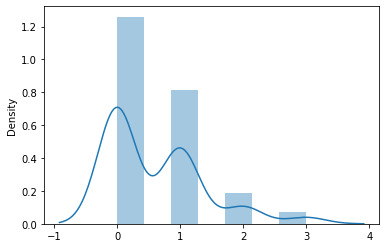

Lambda: 0.5
Expriment № 2
Chi-square: 6.447642320548204, G: 7.814727903251179, Pass: True


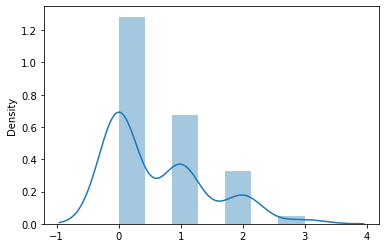

Lambda: 0.5
Expriment № 3
Chi-square: 1.715812273638837, G: 7.814727903251179, Pass: True


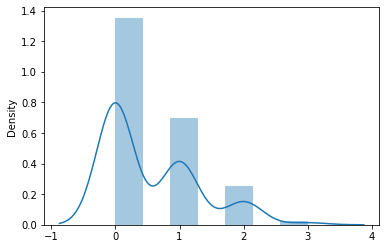

Lambda: 0.5
Expriment № 4
Chi-square: 4.601074497364061, G: 7.814727903251179, Pass: True


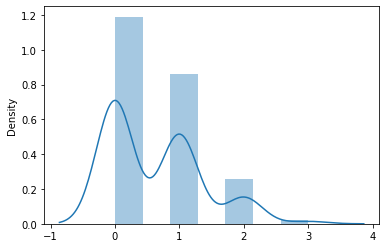

Lambda: 0.5
Expriment № 5
Chi-square: 0.6276562349767525, G: 7.814727903251179, Pass: True


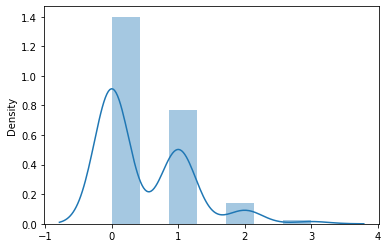

Lambda: 0.5
Expriment № 6
Chi-square: 0.5346427961058571, G: 5.991464547107979, Pass: True


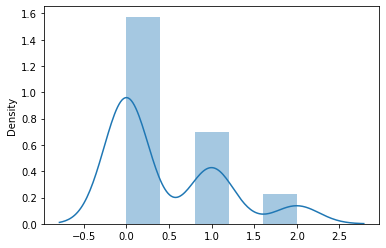

Lambda: 0.5
Expriment № 7
Chi-square: 2.6944676607230247, G: 5.991464547107979, Pass: True


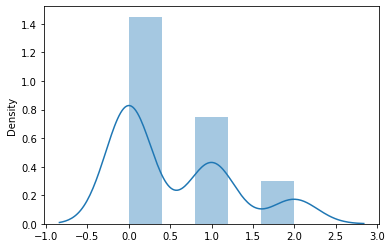

Lambda: 0.5
Expriment № 8
Chi-square: 5.325500259406716, G: 7.814727903251179, Pass: True


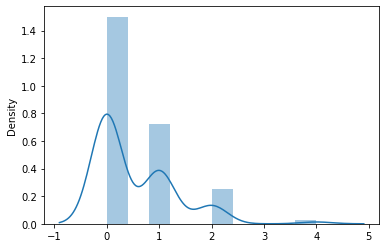

Lambda: 0.5
Expriment № 9
Chi-square: 0.38034804437173325, G: 7.814727903251179, Pass: True


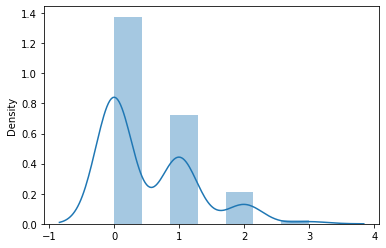

Lambda: 0.5
Expriment № 10
Chi-square: 1.1387598288937921, G: 7.814727903251179, Pass: True


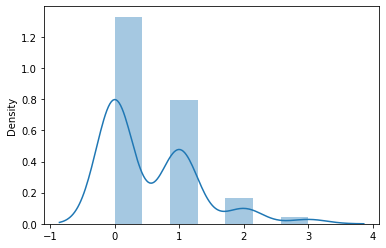

Lambda: 1
Expriment № 1
Chi-square: 12.91237430899975, G: 11.070497693516351, Pass: False


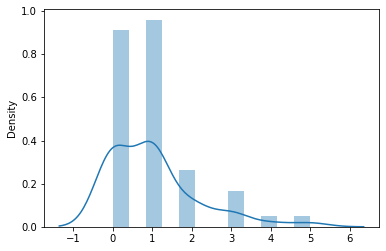

Lambda: 1
Expriment № 2
Chi-square: 2.1676058867408146, G: 9.487729036781154, Pass: True


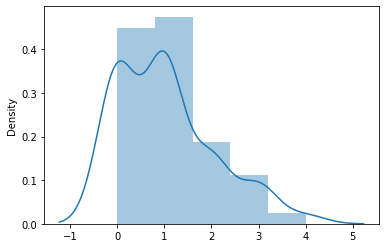

Lambda: 1
Expriment № 3
Chi-square: 3.7170265289624704, G: 9.487729036781154, Pass: True


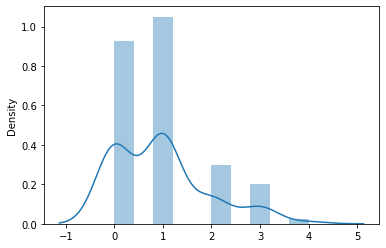

Lambda: 1
Expriment № 4
Chi-square: 2.955907616993938, G: 9.487729036781154, Pass: True


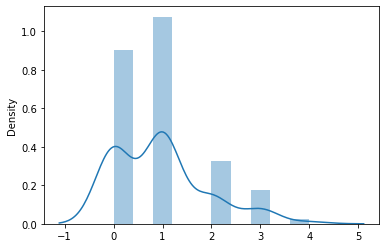

Lambda: 1
Expriment № 5
Chi-square: 6.198218192705906, G: 11.070497693516351, Pass: True


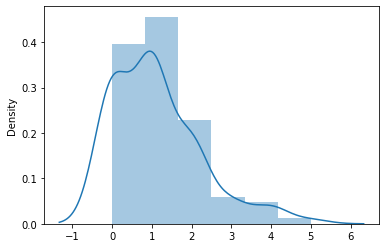

Lambda: 1
Expriment № 6
Chi-square: 0.7540993359421114, G: 9.487729036781154, Pass: True


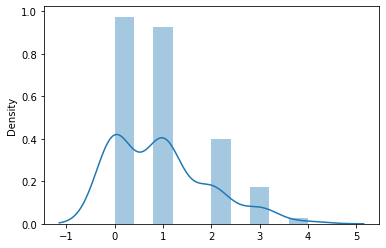

Lambda: 1
Expriment № 7
Chi-square: 12.252431470323872, G: 9.487729036781154, Pass: False


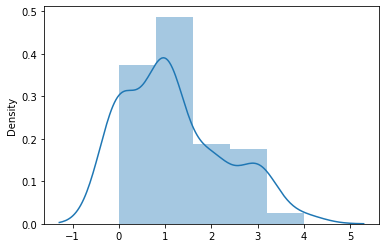

Lambda: 1
Expriment № 8
Chi-square: 3.0102732535631183, G: 9.487729036781154, Pass: True


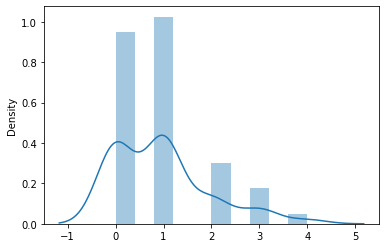

Lambda: 1
Expriment № 9
Chi-square: 5.592640990599211, G: 9.487729036781154, Pass: True


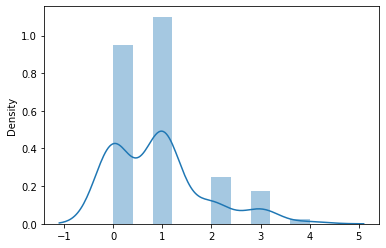

Lambda: 1
Expriment № 10
Chi-square: 2.5481653427250817, G: 9.487729036781154, Pass: True


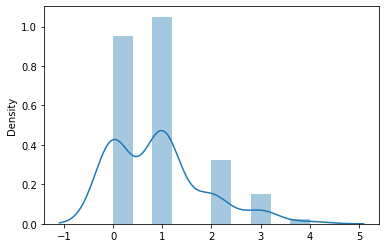

Lambda: 2
Expriment № 1
Chi-square: 4.159145979249267, G: 14.067140449340169, Pass: True


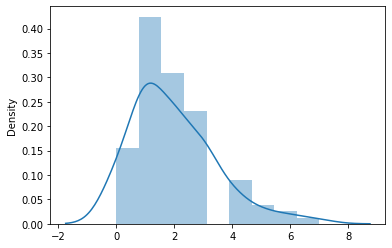

Lambda: 2
Expriment № 2
Chi-square: 9.65475645282894, G: 14.067140449340169, Pass: True


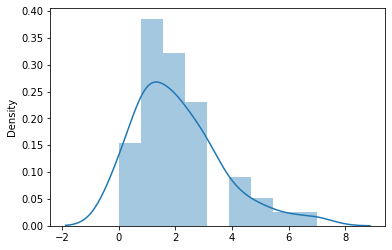

Lambda: 2
Expriment № 3
Chi-square: 3.27245924737759, G: 14.067140449340169, Pass: True


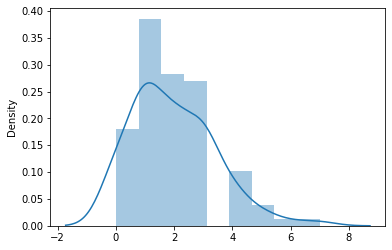

Lambda: 2
Expriment № 4
Chi-square: 4.029837497517981, G: 14.067140449340169, Pass: True


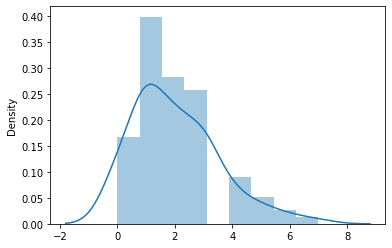

Lambda: 2
Expriment № 5
Chi-square: 3.5310762108401628, G: 14.067140449340169, Pass: True


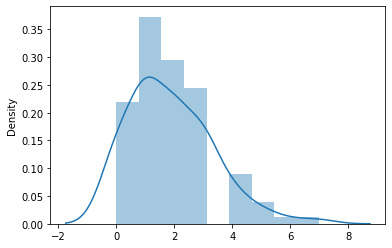

Lambda: 2
Expriment № 6
Chi-square: 2.5478027871080506, G: 11.070497693516351, Pass: True


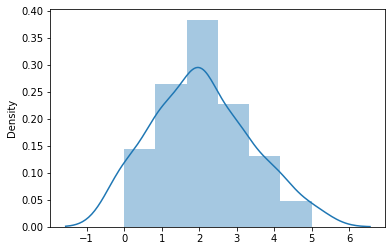

Lambda: 2
Expriment № 7
Chi-square: 15.919781779519449, G: 15.50731305586545, Pass: False


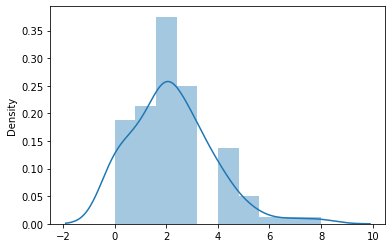

Lambda: 2
Expriment № 8
Chi-square: 2.6443894789684843, G: 14.067140449340169, Pass: True


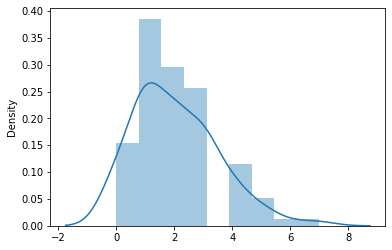

Lambda: 2
Expriment № 9
Chi-square: 5.70888294876123, G: 12.591587243743977, Pass: True


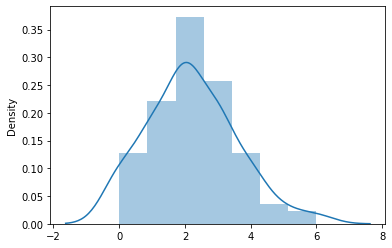

Lambda: 2
Expriment № 10
Chi-square: 2.311881954516605, G: 14.067140449340169, Pass: True


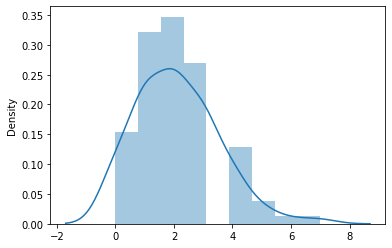

Lambda: 4
Expriment № 1
Chi-square: 11.40150511691446, G: 19.67513757268249, Pass: True


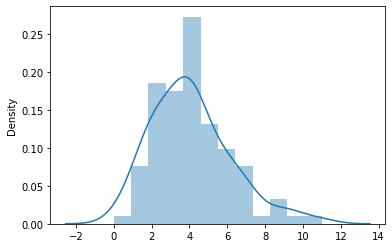

Lambda: 4
Expriment № 2
Chi-square: 69.27715924844358, G: 19.67513757268249, Pass: False


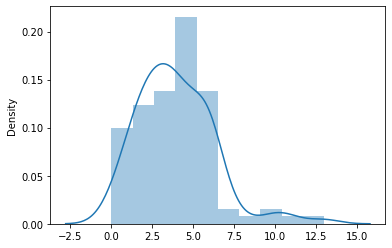

Lambda: 4
Expriment № 3
Chi-square: 25.463187460622336, G: 18.307038053275146, Pass: False


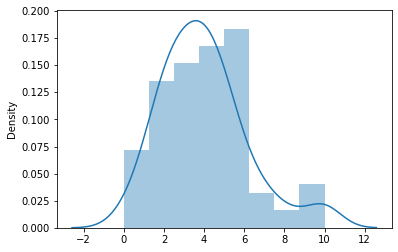

Lambda: 4
Expriment № 4
Chi-square: 9.028565012202462, G: 19.67513757268249, Pass: True


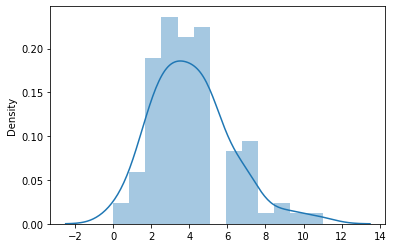

Lambda: 4
Expriment № 5
Chi-square: 7.517644636373854, G: 18.307038053275146, Pass: True


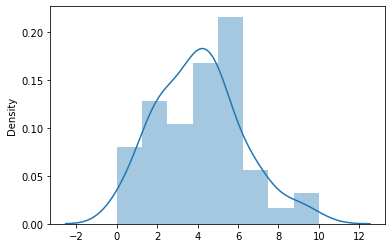

Lambda: 4
Expriment № 6
Chi-square: 13.758914143130022, G: 16.918977604620448, Pass: True


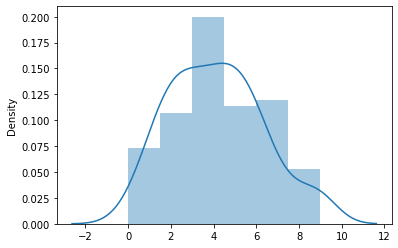

Lambda: 4
Expriment № 7
Chi-square: 59.71183973686643, G: 21.02606981748307, Pass: False


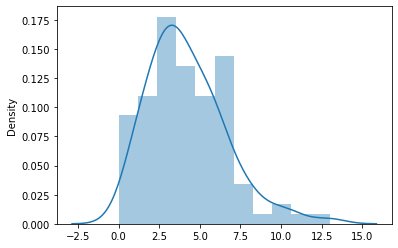

Lambda: 4
Expriment № 8
Chi-square: 25.85881077433907, G: 18.307038053275146, Pass: False


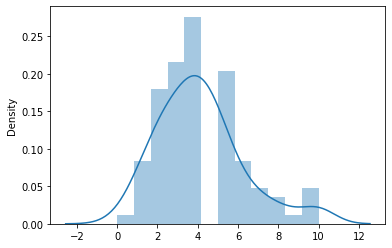

Lambda: 4
Expriment № 9
Chi-square: 18.863627897205447, G: 16.918977604620448, Pass: False


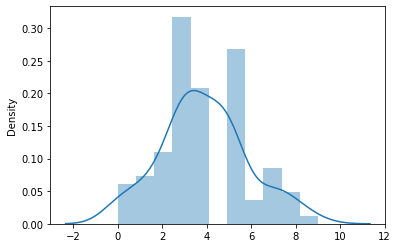

Lambda: 4
Expriment № 10
Chi-square: 28.556727172461237, G: 18.307038053275146, Pass: False


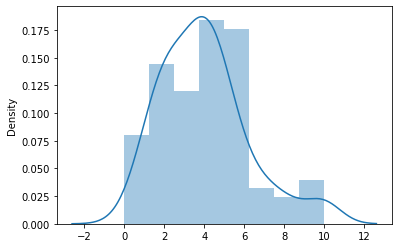

Lambda: 6
Expriment № 1
Chi-square: 18.047927056480944, G: 21.02606981748307, Pass: True


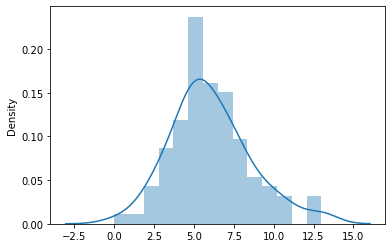

Lambda: 6
Expriment № 2
Chi-square: 10.076399818501455, G: 21.02606981748307, Pass: True


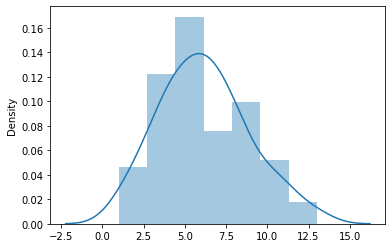

Lambda: 6
Expriment № 3
Chi-square: 19.757933876635338, G: 21.02606981748307, Pass: True


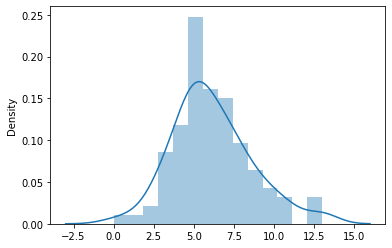

Lambda: 6
Expriment № 4
Chi-square: 9.178738471297974, G: 21.02606981748307, Pass: True


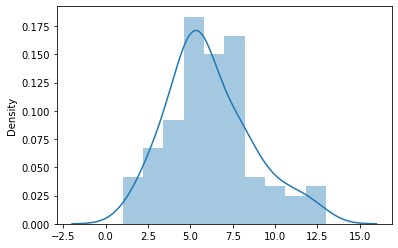

Lambda: 6
Expriment № 5
Chi-square: 23.120780488153937, G: 22.362032494826934, Pass: False


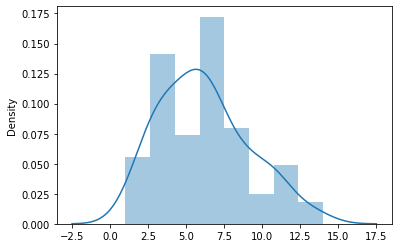

Lambda: 6
Expriment № 6
Chi-square: 33.14127220885887, G: 22.362032494826934, Pass: False


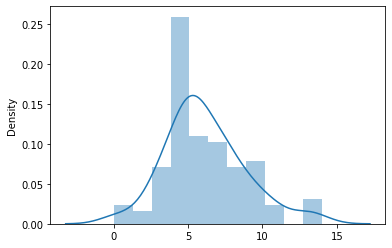

Lambda: 6
Expriment № 7
Chi-square: 19.457022482312052, G: 21.02606981748307, Pass: True


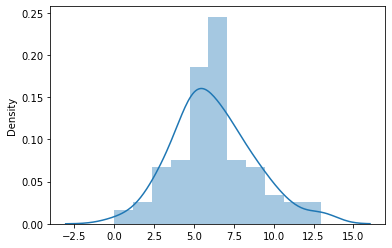

Lambda: 6
Expriment № 8
Chi-square: 20.424550613025083, G: 21.02606981748307, Pass: True


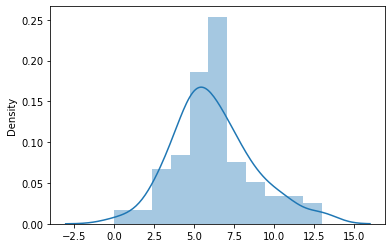

Lambda: 6
Expriment № 9
Chi-square: 36.20316337996249, G: 23.684791304840576, Pass: False


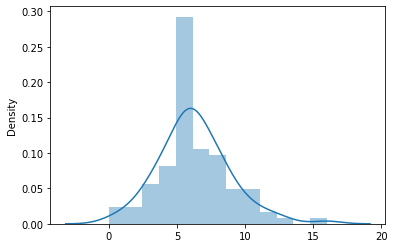

Lambda: 6
Expriment № 10
Chi-square: 30.804956091680754, G: 21.02606981748307, Pass: False


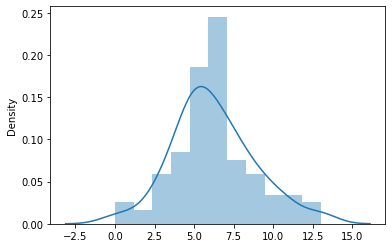

Lambda: 10
Expriment № 1
Chi-square: 19.435302736218464, G: 27.58711163827534, Pass: True


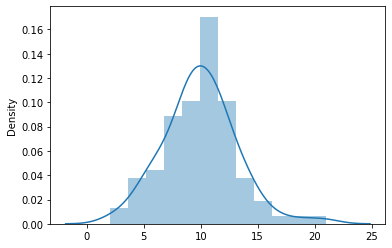

Lambda: 10
Expriment № 2
Chi-square: 19.7336769669769, G: 26.29622760486423, Pass: True


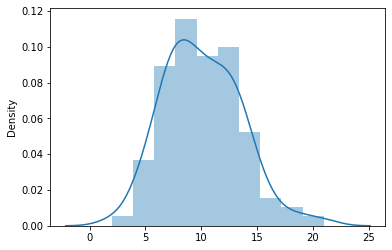

Lambda: 10
Expriment № 3
Chi-square: 9.190955541064364, G: 22.362032494826934, Pass: True


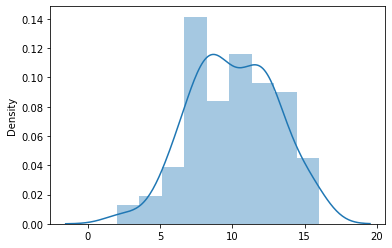

Lambda: 10
Expriment № 4
Chi-square: 15.46922017909225, G: 26.29622760486423, Pass: True


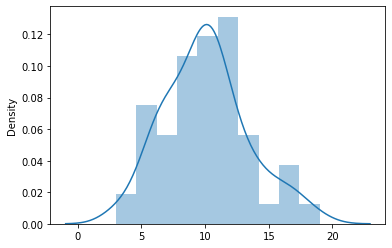

Lambda: 10
Expriment № 5
Chi-square: 10.206992355247207, G: 22.362032494826934, Pass: True


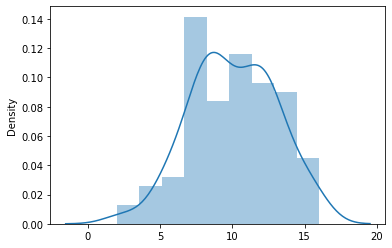

Lambda: 10
Expriment № 6
Chi-square: 31.230132246399016, G: 23.684791304840576, Pass: False


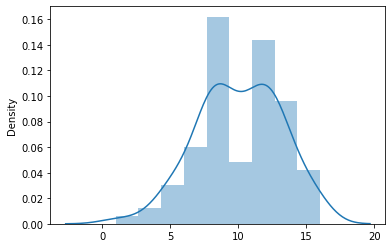

Lambda: 10
Expriment № 7
Chi-square: 10.743793252134875, G: 24.995790139728616, Pass: True


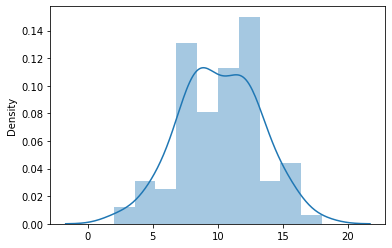

Lambda: 10
Expriment № 8
Chi-square: 7.446484858392093, G: 22.362032494826934, Pass: True


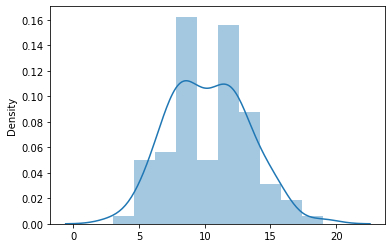

Lambda: 10
Expriment № 9
Chi-square: 11.893659407370041, G: 23.684791304840576, Pass: True


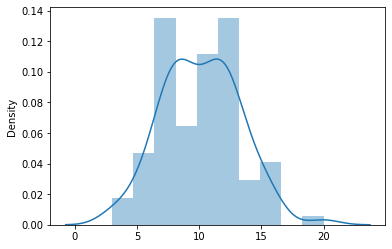

Lambda: 10
Expriment № 10
Chi-square: 19.85030455848637, G: 21.02606981748307, Pass: True


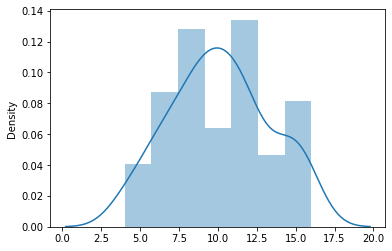

In [7]:
lambdas = [0.5, 1, 2, 4, 6, 10]
n = 100
success_probas = {}

for l in lambdas:
    for i in range(10):
        generated = generate_poisson(n=n, lambda_=l)
        chi_square, G, pass_ = calculate_chi_square(generated, lambda_=l)
        success_probas.setdefault(l, [])
        success_probas[l].append(pass_)
        print(f'Lambda: {l}')
        print(f'Expriment № {i + 1}')
        print(f'Chi-square: {chi_square}, G: {G}, Pass: {pass_}')
        distplot(generated)
        plt.show()

In [8]:
for s in success_probas:
    success_probas[s] = sum(success_probas[s]) / len(success_probas[s])

In [9]:
column_names = ['Lambda', 'Chi-square criteria passed probability']
df_by_text = pd.DataFrame(success_probas.items(), columns=column_names)
df_by_text

,Lambda,Chi-square criteria passed probability
0,0.5,1.0
1,1.0,0.8
2,2.0,0.9
3,4.0,0.4
4,6.0,0.6
5,10.0,0.9
